In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../datasets/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = np.array(data.iloc[:, 8:10])
X = sc.fit_transform(X)
X = np.c_[np.ones(len(X),dtype='int64'),X]
X

array([[ 1.        , -0.2326465 , -0.22235202],
       [ 1.        , -0.23156838, -0.22233464],
       [ 1.        , -0.23339891, -0.22231148],
       ...,
       [ 1.        , -0.23164379, -0.22256082],
       [ 1.        , -0.22954271, -0.2225293 ],
       [ 1.        , -0.22811058, -0.22262764]])

In [4]:
Y = np.array(data.iloc[:, 7]/10000)
Y

array([0.869687, 0.950556, 0.814535, ..., 0.939411, 1.096954, 1.201415])

In [5]:
B = np.zeros(X.shape[1])
B

array([0., 0., 0.])

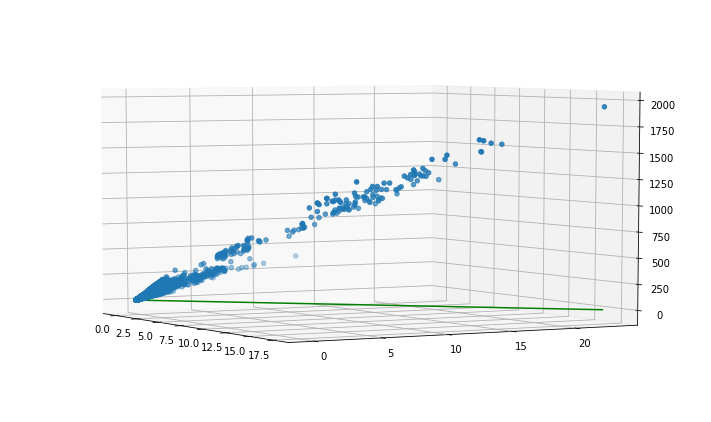

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X.T[1], ys=X.T[2], zs=Y)
ax.plot(xs=[max(X.T[1]), min(X.T[1])], ys=[max(X.T[2]), min(X.T[2])], zs=[max(X.dot(B)), min(X.dot(B))], color='green')
ax.view_init(5, -30)

In [7]:
def error(X, Y, B):
    error = np.mean((X.dot(B) - Y)** 2)
    return error
error(X, Y, B)

10300.477170461494

In [8]:
def gradient_descent(X, Y, B, itr, lr):
    for _ in range(itr):
        grad = 2/len(X)*X.T.dot(X.dot(B) - Y)
        B -= grad*lr
    return B

B = gradient_descent(X, Y, B, 100000, 0.01)

In [9]:
error(X, Y, B)

1.0873421262672602

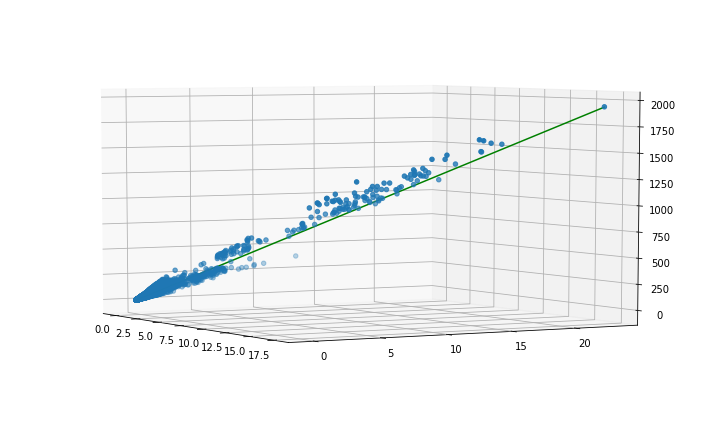

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X.T[1], ys=X.T[2], zs=Y)
ax.plot(xs=[max(X.T[1]), min(X.T[1])], ys=[max(X.T[2]), min(X.T[2])], zs=[max(X.dot(B)), min(X.dot(B))], color='green')
ax.view_init(5, -30)

In [11]:
B

array([23.96392021, 76.19315275, 24.22991316])